In [ ]:
import random
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import cauchy
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import uniform

# Question 4:

Use the basic Metropolis-Hastings algorithm with a random walk sampler to simulate a sample of 10000 values from the distribution given by the probability density function $f / C$ where $f(x)=x^3 \sin (\pi x)$ on $[-1,1]$ and $C=\frac{2}{\pi}-\frac{12}{\pi^3}$.



## Solution


In [ ]:
#target distribution
def p(x):
  c=(2/np.pi)-(12/np.pi**3)
  f= x**3*np.sin(np.pi*x)
  return f/c

#Trasition distribution
def T(x,loc,scale):
  return norm.pdf(x,loc=loc,scale=scale)

# fuction to detect whether the sample in the interval [-1,1]
def h(x):
  if x>=-1 and x<=1:
    return 1
  else:
    return 0

###  Effect of transition distribution standard deviation on generated samples.

In [ ]:
#  Metropolis-Hastings with random walk (normal)
## case1 scale=1/3 start_point=0
### initilize samples size, scale and samples list
N=10000
scale=3/3

X= np.empty(N)
X[0] = 0

#normal random walk
for n in range(1,N):
  Y=norm.rvs(loc=X[n-1],scale=scale,size=1)
  R= min(1,(p(Y)*T(Y,X[n-1],scale))/(p(X[n-1])*T(X[n-1],Y,scale)) )
  if uniform.rvs(0,1,1)<= R:
    X[n]=Y
  else:
    X[n]=X[n-1]

X_1=X



<ipython-input-58-e308235b2365>:13: RuntimeWarning: divide by zero encountered in divide
  R= min(1,(p(Y)*T(Y,X[n-1],scale))/(p(X[n-1])*T(X[n-1],Y,scale)) )


In [ ]:
## case2 scale=1/3 start_point=0
### initilize samples size, scale and samples list
N=10000
scale=1/3

X= np.empty(N)
X[0] = 0

#normal random walk
for n in range(1,N):
  Y=norm.rvs(loc=X[n-1],scale=scale,size=1)
  R= min(1,(p(Y)*T(Y,X[n-1],scale))/(p(X[n-1])*T(X[n-1],Y,scale)) )
  if uniform.rvs(0,1,1)<= R:
    X[n]=Y
  else:
    X[n]=X[n-1]

X_2=X


<ipython-input-102-c96d4471da93>:12: RuntimeWarning: divide by zero encountered in divide
  R= min(1,(p(Y)*T(Y,X[n-1],scale))/(p(X[n-1])*T(X[n-1],Y,scale)) )


In [ ]:
##case3 scale=.1/3 start_point=0
### initilize samples size, scale and samples list
N=10000
scale=.1/3

X= np.empty(N)
X[0] = 0

#normal random walk
for n in range(1,N):
  Y=norm.rvs(loc=X[n-1],scale=scale,size=1)
  R= min(1,(p(Y)*T(Y,X[n-1],scale))/(p(X[n-1])*T(X[n-1],Y,scale)) )
  if uniform.rvs(0,1,1)<= R:
    X[n]=Y
  else:
    X[n]=X[n-1]

X_3=X

<ipython-input-106-b11b1396bcfd>:12: RuntimeWarning: divide by zero encountered in divide
  R= min(1,(p(Y)*T(Y,X[n-1],scale))/(p(X[n-1])*T(X[n-1],Y,scale)) )


(0.0, 1.5)

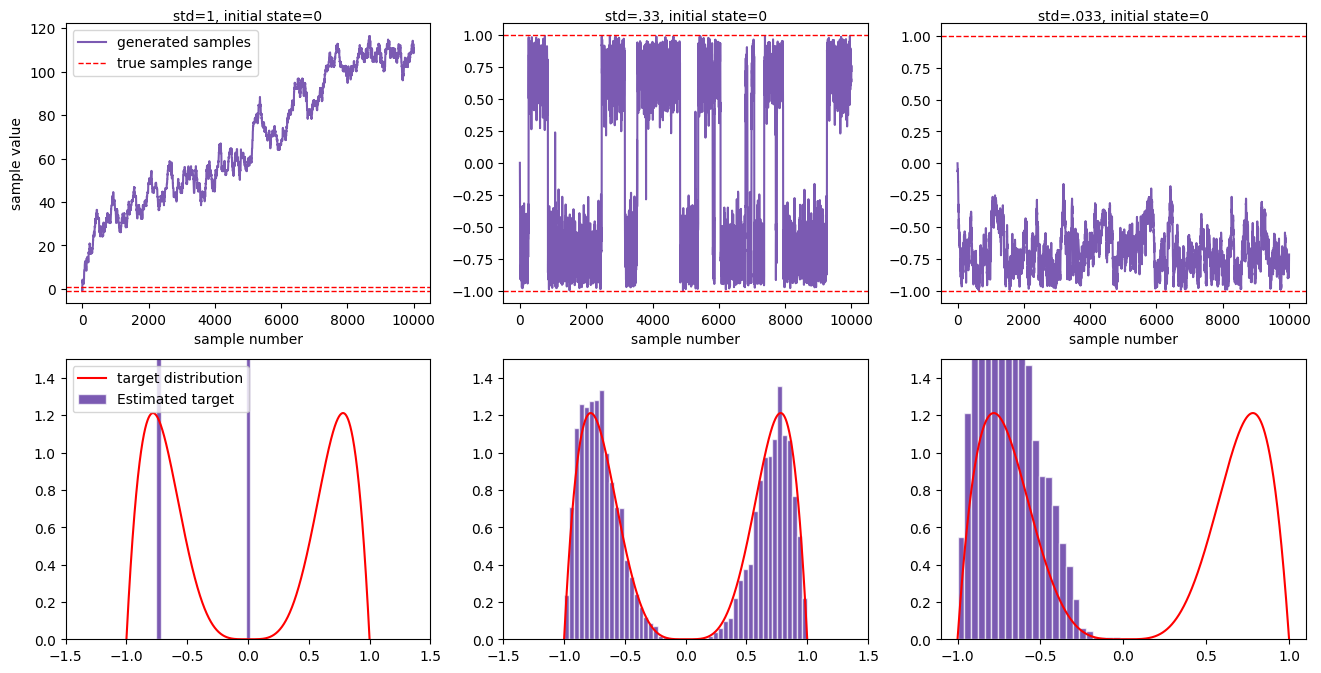

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(16, 8))
axs[0,0].plot([x for x in range(N)],X_1,color='#431492',alpha=0.7,label='generated samples')
axs[0,0].axhline(-1, color='red', linestyle='dashed', linewidth=1, label='true samples range')
axs[0,0].axhline(1, color='red', linestyle='dashed', linewidth=1)
axs[0,0].legend(loc='upper left')#,bbox_to_anchor=(.8, -.13),fancybox=False, shadow=True)
axs[0,0].set_ylabel('sample value')
axs[0,0].set_xlabel('sample number')
axs[0,0].set_title(label='std=1, initial state=0',fontsize=10,pad='.0')

axs[0,1].plot([x for x in range(N)],X_2,color='#431492',alpha=0.7)
axs[0,1].axhline(-1, color='red', linestyle='dashed', linewidth=1, label='expected samples range')
axs[0,1].axhline(1, color='red', linestyle='dashed', linewidth=1)
axs[0,1].set_xlabel('sample number')
axs[0,1].set_title(label='std=.33, initial state=0',fontsize=10,pad='.0')

axs[0,2].plot([x for x in range(N)],X_3,color='#431492',alpha=0.7)
axs[0,2].axhline(-1, color='red', linestyle='dashed', linewidth=1, label='True samples range')
axs[0,2].axhline(1, color='red', linestyle='dashed', linewidth=1)
axs[0,2].set_xlabel('sample number')
axs[0,2].set_title(label='std=.033, initial state=0',fontsize=10,pad='.0')

wv = np. linspace (-1,1,1000)
axs[1,0].plot(wv ,p(wv),label='target distribution',color='red')
axs[1,0].hist(X_1, bins=np. linspace (-1,1,50), alpha=0.7, color='#431492',label='Estimated target',density=True,edgecolor = "white")
axs[1,0].legend(loc='upper left')#,bbox_to_anchor=(.8, -.13),fancybox=False, shadow=True)
axs[1,0].set_xlim(-1.5,1.5)
axs[1,0].set_ylim(0,1.5)



wv = np. linspace (-1,1,1000)
axs[1,1].plot(wv ,p(wv),label='target distribution',color='red')
axs[1,1].hist(X_2, bins=np. linspace (-1,1,50), alpha=0.7, color='#431492',label='estimated target',density=True,edgecolor = "white")
axs[1,1].set_xlim(-1.5,1.5)
axs[1,1].set_ylim(0,1.5)


wv = np. linspace (-1,1,1000)
axs[1,2].plot(wv ,p(wv),label='target distribution',color='red')
axs[1,2].hist(X_3, bins=np. linspace (-1,1,50), alpha=0.7, color='#431492',label='Estimated target',density=True,edgecolor = "white")
axs[1,2].set_ylim(0,1.5)


In [ ]:
np.mean(X_1),np.mean(X_2),np.mean(X_3)

(68.42829829850447, -0.056199999639450764, -0.6951784063082493)

In [ ]:
np.std(X_1),np.std(X_2),np.std(X_3)

(28.912531402376985, 0.7277730555543926, 0.1681828269135701)

### Effect of initial state on generated samples.

In [ ]:
 #  Metropolis-Hastings with random walk (normal)
#case1 scale=1/3 start_point=1
  #initilize samples size, scale and samples list
N=10000
scale=1/3

X= np.empty(N)
X[0] = 1

#normal random walk
for n in range(1,N):
  Y=norm.rvs(loc=X[n-1],scale=scale,size=1)
  R= min(1,(p(Y)*T(Y,X[n-1],scale))/(p(X[n-1])*T(X[n-1],Y,scale)) )
  if uniform.rvs(0,1,1)<= R:
    X[n]=Y
  else:
    X[n]=X[n-1]

X_1=X

In [ ]:
#case2 scale=1/3 start_point=0
  #initilize samples size, scale and samples list
N=10000
scale=1/3

X= np.empty(N)
X[0] = 0

#normal random walk
for n in range(1,N):
  Y=norm.rvs(loc=X[n-1],scale=scale,size=1)
  R= min(1,(p(Y)*T(Y,X[n-1],scale))/(p(X[n-1])*T(X[n-1],Y,scale)) )
  if uniform.rvs(0,1,1)<= R:
    X[n]=Y
  else:
    X[n]=X[n-1]

X_2=X

<ipython-input-146-c96d4471da93>:12: RuntimeWarning: divide by zero encountered in divide
  R= min(1,(p(Y)*T(Y,X[n-1],scale))/(p(X[n-1])*T(X[n-1],Y,scale)) )


In [ ]:
#case3 scale=1/3 start_point= -.5
  #initilize samples size, scale and samples list
N=10000
scale=1/3

X= np.empty(N)
X[0] = -.5

#normal random walk
for n in range(1,N):
  Y=norm.rvs(loc=X[n-1],scale=scale,size=1)
  R= min(1,(p(Y)*T(Y,X[n-1],scale))/(p(X[n-1])*T(X[n-1],Y,scale)) )
  if uniform.rvs(0,1,1)<= R:
    X[n]=Y
  else:
    X[n]=X[n-1]

X_3=X

(0.0, 1.5)

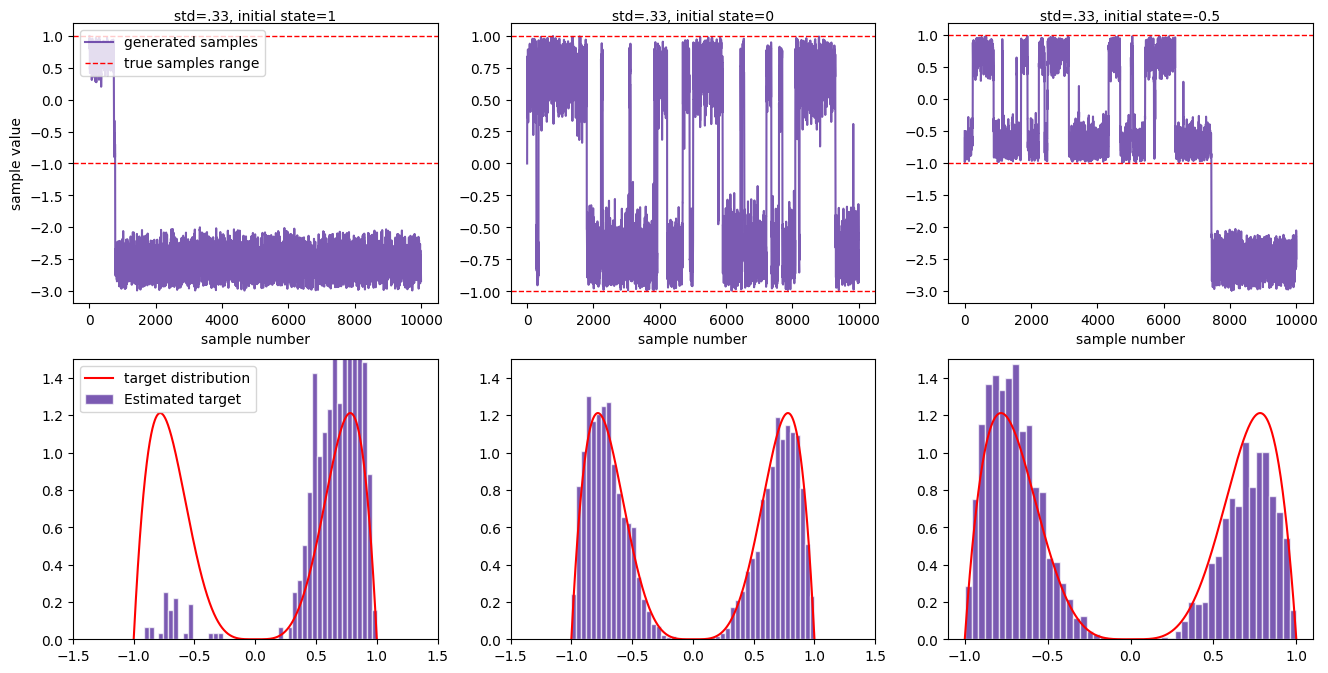

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(16, 8))
axs[0,0].plot([x for x in range(N)],X_1,color='#431492',alpha=0.7,label='generated samples')
axs[0,0].axhline(-1, color='red', linestyle='dashed', linewidth=1, label='true samples range')
axs[0,0].axhline(1, color='red', linestyle='dashed', linewidth=1)
axs[0,0].legend(loc='upper left')#,bbox_to_anchor=(.8, -.13),fancybox=False, shadow=True)
axs[0,0].set_ylabel('sample value')
axs[0,0].set_xlabel('sample number')
axs[0,0].set_title(label='std=.33, initial state=1',fontsize=10,pad='.0')

axs[0,1].plot([x for x in range(N)],X_2,color='#431492',alpha=0.7)
axs[0,1].axhline(-1, color='red', linestyle='dashed', linewidth=1, label='expected samples range')
axs[0,1].axhline(1, color='red', linestyle='dashed', linewidth=1)
axs[0,1].set_xlabel('sample number')
axs[0,1].set_title(label='std=.33, initial state=0',fontsize=10,pad='.0')

axs[0,2].plot([x for x in range(N)],X_3,color='#431492',alpha=0.7)
axs[0,2].axhline(-1, color='red', linestyle='dashed', linewidth=1, label='True samples range')
axs[0,2].axhline(1, color='red', linestyle='dashed', linewidth=1)
axs[0,2].set_xlabel('sample number')
axs[0,2].set_title(label='std=.33, initial state=-0.5',fontsize=10,pad='.0')

wv = np. linspace (-1,1,1000)
axs[1,0].plot(wv ,p(wv),label='target distribution',color='red')
axs[1,0].hist(X_1, bins=np. linspace (-1,1,50), alpha=0.7, color='#431492',label='Estimated target',density=True,edgecolor = "white")
axs[1,0].legend(loc='upper left')#,bbox_to_anchor=(.8, -.13),fancybox=False, shadow=True)
axs[1,0].set_xlim(-1.5,1.5)
axs[1,0].set_ylim(0,1.5)



wv = np. linspace (-1,1,1000)
axs[1,1].plot(wv ,p(wv),label='target distribution',color='red')
axs[1,1].hist(X_2, bins=np. linspace (-1,1,50), alpha=0.7, color='#431492',label='estimated target',density=True,edgecolor = "white")
axs[1,1].set_xlim(-1.5,1.5)
axs[1,1].set_ylim(0,1.5)


wv = np. linspace (-1,1,1000)
axs[1,2].plot(wv ,p(wv),label='target distribution',color='red')
axs[1,2].hist(X_3, bins=np. linspace (-1,1,50), alpha=0.7, color='#431492',label='Estimated target',density=True,edgecolor = "white")
axs[1,2].set_ylim(0,1.5)

In [ ]:
np.mean(X_1),np.mean(X_2),np.mean(X_3)

(-2.309115949820904, -0.03844819727021712, -0.7637178982216972)

In [ ]:
np.std(X_1),np.std(X_2),np.std(X_3)

(0.8839942027519361, 0.7261753499585254, 1.223035853882021)